In [61]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

quandl.ApiConfig.api_key = '57jsryd5wUoVJnCLeadb'
results=pd.read_csv('results.csv')

In [3]:
results.dropna(inplace=True)

In [4]:
fundamental_data=pd.read_csv('ZACKSFC.csv')

In [5]:
fundamental_data

,None,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,...,stock_based_compsn_qd,cash_flow_oper_activity_qd,net_change_prop_plant_equip_qd,comm_stock_div_paid_qd,pref_stock_div_paid_qd,tot_comm_pref_stock_div_qd,wavg_shares_out,wavg_shares_out_diluted,eps_basic_net,eps_diluted_net
0,0,CAB7,CABO,Cable One,"Cable One, Inc.",NYSE,USD,2023-06-30,Q,NaN,...,5.999,169.5640,-84.112,-16.339,NaN,-16.339,5.6608,6.0710,9.7600,9.3600
1,1,CAB7,CABO,Cable One,"Cable One, Inc.",NYSE,USD,2023-03-31,Q,NaN,...,5.585,161.7870,-100.714,-16.498,NaN,-16.498,5.7187,6.1286,10.0400,9.6200
2,2,CAB7,CABO,Cable One,"Cable One, Inc.",NYSE,USD,2022-12-31,Q,NaN,...,5.498,168.2469,-107.451,-16.504,NaN,-16.504,5.8921,6.3141,-12.5000,-11.4300
3,3,CAB7,CABO,Cable One,"Cable One, Inc.",NYSE,USD,2022-09-30,Q,NaN,...,5.860,216.7070,-98.334,-16.663,NaN,-16.663,5.8367,6.2613,12.1000,11.5300
4,4,CAB7,CABO,Cable One,"Cable One, Inc.",NYSE,USD,2022-06-30,Q,NaN,...,5.951,164.3670,-102.351,-16.426,NaN,-16.426,5.9465,6.3696,11.6400,11.1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52332,32,SAEC,STN,Stantec,Stantec Inc.,NYSE,USD,2020-12-31,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,111.5540,111.9490,1.1421,1.1421
52333,33,SAEC,STN,Stantec,Stantec Inc.,NYSE,USD,2019-12-31,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,111.5500,111.5500,1.3113,1.3113
52334,34,SAEC,STN,Stantec,Stantec Inc.,NYSE,USD,2018-12-31,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,112.8571,112.8571,0.3240,0.3240
52335,35,SAEC,STN,Stantec,Stantec Inc.,NYSE,USD,2017-12-31,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,113.9900,114.3500,0.6557,0.6557


In [6]:
data_MT = quandl.get_table('ZACKS/MT', ticker = list(results['Short_ticker'].unique()), paginate = True)
set(data_MT.zacks_x_sector_desc)

{'Aerospace',
 'Auto/Tires/Trucks',
 'Basic Materials',
 'Business Services',
 'Computer and Technology',
 'Construction',
 'Consumer Discretionary',
 'Consumer Staples',
 'Finance',
 'Industrial Products',
 'Medical',
 'Multi-Sector Conglomerates',
 None,
 'Oils/Energy',
 'Retail/Wholesale',
 'Transportation',
 'Utilities'}

In [7]:

data_FR = quandl.get_table('ZACKS/FR', ticker = list(results['Short_ticker'].unique()), paginate = True, per_end_date={'gte' : '2016-01-01', 'lte' : '2023-12-31'})
data_FR.head()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,invty_turn,rcv_turn,day_sale_rcv,ret_equity,ret_tang_equity,ret_asset,ret_invst,free_cash_flow_per_share,book_val_per_share,oper_cash_flow_per_share
None,,,,,,,,,,,,,,,,,,,,,
0,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-10-31,Q,None,2024,...,1.1031,19.0589,4.7222,17.4301,17.6732,3.9241,12.2860,1.7073,5.9900,2.8126
1,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-07-31,Q,None,2024,...,1.3531,18.3305,4.9099,14.9667,15.1850,3.4195,10.4446,1.0904,5.7714,1.7967
2,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-04-30,Q,None,2024,...,1.3001,18.6145,4.8349,13.8742,14.0825,3.1066,9.5992,0.3296,5.5835,0.6395
3,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-01-31,Q,None,2023,...,1.8441,21.2903,4.2273,16.3105,16.5630,3.6615,11.2545,2.2301,5.5079,3.4669
4,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2022-10-31,Q,None,2023,...,1.0354,17.0645,5.2741,18.7643,19.0844,3.7393,12.4721,-0.0350,4.8994,0.9036


In [8]:
data_MT

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,ticker_type,active_ticker_flag,comp_url,sic_4_code,...,per_end_month_nbr,mr_split_date,mr_split_factor,comp_cik,country_code,country_name,comp_type,optionable_flag,sp500_member_flag,asset_type
None,,,,,,,,,,,,,,,,,,,,,
0,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,S,Y,http://www.tjx.com,5651.0,...,1,2018-11-07,2.0,0000109198,US,UNITED STATES,1.0,Y,Y,COM
1,ZTS,ZTS,Zoetis,Zoetis Inc.,NYSE,USD,S,Y,http://www.zoetis.com,2834.0,...,12,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM
2,ZS,ZS,Zscaler,"Zscaler, Inc.",NASDAQ,USD,S,Y,http://www.zscaler.com,7371.0,...,7,NaT,NaN,0001713683,US,UNITED STATES,1.0,Y,N,COM
3,ZM,ZM,Zoom Video Communications,"Zoom Video Communications, Inc.",NASDAQ,USD,S,Y,http://www.zoom.us,7370.0,...,1,NaT,NaN,0001585521,US,UNITED STATES,1.0,Y,N,COM
4,Z25Z,VLO,Valero Energy,Valero Energy Corporation,NYSE,USD,S,Y,http://www.valero.com,2911.0,...,12,2005-12-16,2.0,0001035002,US,UNITED STATES,6.0,Y,Y,COM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,S,Y,http://www.apple.com,3571.0,...,9,2020-08-31,4.0,0000320193,US,UNITED STATES,1.0,Y,Y,COM
378,AAP2,AAP,Advance Auto Parts,"Advance Auto Parts, Inc.",NYSE,USD,S,Y,http://www.advanceautoparts.com,5531.0,...,12,2005-09-26,1.5,0001158449,US,UNITED STATES,1.0,Y,N,COM
379,AAL,AAL,American Airlines,American Airlines Group Inc.,NASDAQ,USD,S,Y,http://www.aa.com,4512.0,...,12,NaT,NaN,0000006201,US,UNITED STATES,1.0,Y,Y,COM


In [9]:
sector_code={}
for i in range(len(fundamental_data)):
    if fundamental_data['ticker'][i] not in sector_code.keys():
         sector_code[fundamental_data['ticker'][i]]=fundamental_data['zacks_sector_code'][i]

### PnL Analysis across sectors

In [33]:
merged_df = pd.merge( results,data_MT, left_on='Short_ticker' , right_on='ticker', how='left')
#merged_df['sector_code']=merged_df['Short_ticker'].apply(lambda x: sector_code[x])
merged_df

,Unnamed: 0.1,Unnamed: 0,index,Short_ticker,Name,Ticker,Date,Event Type,Adjusted Trading Date,trade_entry,...,per_end_month_nbr,mr_split_date,mr_split_factor,comp_cik,country_code,country_name,comp_type,optionable_flag,sp500_member_flag,asset_type
0,2,2,2023,A,Agilent Technologies Inc,A US,2018-08-14 16:05:00,ER,2018-08-15 00:00:00+00:00,2018-08-14,...,10,NaT,NaN,0001090872,US,UNITED STATES,1.0,Y,Y,COM
1,7,7,5992,A,Agilent Technologies Inc,A US,2019-08-14 16:05:00,ER,2019-08-15 00:00:00+00:00,2019-08-14,...,10,NaT,NaN,0001090872,US,UNITED STATES,1.0,Y,Y,COM
2,25,25,32,AA,Alcoa Corp,AA US,2018-01-17 16:10:00,ER,2018-01-18 00:00:00+00:00,2018-01-17,...,12,NaT,NaN,0001675149,US,UNITED STATES,1.0,Y,N,COM
3,26,26,750,AA,Alcoa Corp,AA US,2018-04-18 16:10:00,ER,2018-04-19 00:00:00+00:00,2018-04-18,...,12,NaT,NaN,0001675149,US,UNITED STATES,1.0,Y,N,COM
4,27,27,1452,AA,Alcoa Corp,AA US,2018-07-18 16:10:00,ER,2018-07-19 00:00:00+00:00,2018-07-18,...,12,NaT,NaN,0001675149,US,UNITED STATES,1.0,Y,N,COM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,19457,19457,4342,ZTS,Zoetis Inc,ZTS US,2019-05-02 07:00:00,ER,2019-05-01 00:00:00+00:00,2019-05-01,...,12,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM
3171,19459,19459,5843,ZTS,Zoetis Inc,ZTS US,2019-08-06 07:00:00,ER,2019-08-05 00:00:00+00:00,2019-08-05,...,12,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM
3172,19460,19460,6656,ZTS,Zoetis Inc,ZTS US,2019-11-07 07:00:00,ER,2019-11-06 00:00:00+00:00,2019-11-06,...,12,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM
3173,19462,19462,8015,ZTS,Zoetis Inc,ZTS US,2020-05-06 07:00:00,ER,2020-05-05 00:00:00+00:00,2020-05-05,...,12,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM


In [34]:

def get_previous_quarter(date_str):
    # Convert the input string to a datetime object
    date = pd.Timestamp(date_str)
    
    # Get the current quarter of the datetime
    current_quarter = date.quarter
    
    # Determine the previous quarter and adjust the year if needed
    if current_quarter == 1:
        previous_quarter = 4
        year = date.year - 1
    else:
        previous_quarter = current_quarter - 1
        year = date.year
    
    # Return the result as "Q<quarter> <year>"
    return f"Q{previous_quarter} {year}"

def current_quarter(date_str):
    # Convert the input string to a datetime object
    date = pd.Timestamp(date_str)
    
    # Get the current quarter of the datetime
    current_quarter = date.quarter
    
    # Determine the previous quarter and adjust the year if needed
    year = date.year
    
    # Return the result as "Q<quarter> <year>"
    return f"Q{current_quarter} {year}"


In [35]:
merged_df['quarter']=merged_df['Date'].apply(lambda x: get_previous_quarter(x))
merged_df['quarter_with_ticker']=merged_df['quarter']+merged_df['Short_ticker']
merged_df.drop_duplicates(subset='quarter_with_ticker',inplace=True)
data_FR['quarter']=data_FR['per_end_date'].apply(lambda x: current_quarter(x))
data_FR['quarter_with_ticker']=data_FR['quarter']+data_FR['ticker']
data_FR.drop_duplicates(subset='quarter_with_ticker',inplace=True)

In [36]:
data_FR

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,day_sale_rcv,ret_equity,ret_tang_equity,ret_asset,ret_invst,free_cash_flow_per_share,book_val_per_share,oper_cash_flow_per_share,quarter,quarter_with_ticker
None,,,,,,,,,,,,,,,,,,,,,
0,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-10-31,Q,None,2024,...,4.7222,17.4301,17.6732,3.9241,12.2860,1.7073,5.9900,2.8126,Q4 2023,Q4 2023TJX
1,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-07-31,Q,None,2024,...,4.9099,14.9667,15.1850,3.4195,10.4446,1.0904,5.7714,1.7967,Q3 2023,Q3 2023TJX
2,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-04-30,Q,None,2024,...,4.8349,13.8742,14.0825,3.1066,9.5992,0.3296,5.5835,0.6395,Q2 2023,Q2 2023TJX
3,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-01-31,Q,None,2023,...,4.2273,16.3105,16.5630,3.6615,11.2545,2.2301,5.5079,3.4669,Q1 2023,Q1 2023TJX
4,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2022-10-31,Q,None,2023,...,5.2741,18.7643,19.0844,3.7393,12.4721,-0.0350,4.8994,0.9036,Q4 2022,Q4 2022TJX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,A2,A,Agilent Technologies,"Agilent Technologies, Inc.",NYSE,USD,2017-01-31,Q,None,2017,...,55.0797,3.9070,12.6697,2.1341,2.7532,0.2577,13.3540,0.3558,Q1 2017,Q1 2017A
14730,A2,A,Agilent Technologies,"Agilent Technologies, Inc.",NYSE,USD,2016-10-31,Q,None,2016,...,51.1161,2.9675,9.5963,1.6166,2.0488,1.9878,13.1049,2.4103,Q4 2016,Q4 2016A
14731,A2,A,Agilent Technologies,"Agilent Technologies, Inc.",NYSE,USD,2016-07-31,Q,None,2016,...,50.8621,2.8532,8.9920,1.6033,2.0674,1.4390,13.4136,1.7043,Q3 2016,Q3 2016A


In [37]:
merged_df = pd.merge(merged_df,data_FR, left_on='quarter_with_ticker' , right_on='quarter_with_ticker', how='left')

# Display the merged dataframe
print(merged_df)

      Unnamed: 0.1  Unnamed: 0  index Short_ticker                      Name  \
0                2           2   2023            A  Agilent Technologies Inc   
1                7           7   5992            A  Agilent Technologies Inc   
2               25          25     32           AA                Alcoa Corp   
3               26          26    750           AA                Alcoa Corp   
4               27          27   1452           AA                Alcoa Corp   
...            ...         ...    ...          ...                       ...   
3154         19457       19457   4342          ZTS                Zoetis Inc   
3155         19459       19459   5843          ZTS                Zoetis Inc   
3156         19460       19460   6656          ZTS                Zoetis Inc   
3157         19462       19462   8015          ZTS                Zoetis Inc   
3158         19463       19463   8903          ZTS                Zoetis Inc   

      Ticker                 Date Event

In [38]:
merged_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'Short_ticker', 'Name', 'Ticker',
       'Date', 'Event Type', 'Adjusted Trading Date', 'trade_entry',
       'trade_exit', 'stock_price_entry', 'stock_price_exit', 'year_entry',
       'year_exit', 'straddle_entry_mid', 'IV_25c', 'IV_25p', 'IV_10c',
       'IV_10p', 'IV_50c', 'straddle_exit_mid', 'straddle_pnl', 'skew_25',
       'kurt_25', 'skew_25_decile', 'kurt_25_decile', 'm_ticker_x', 'ticker_x',
       'comp_name_x', 'comp_name_2_x', 'exchange_x', 'currency_code_x',
       'ticker_type', 'active_ticker_flag', 'comp_url', 'sic_4_code',
       'sic_4_desc', 'zacks_x_ind_code', 'zacks_x_ind_desc',
       'zacks_x_sector_code', 'zacks_x_sector_desc', 'zacks_m_ind_code',
       'zacks_m_ind_desc', 'per_end_month_nbr', 'mr_split_date',
       'mr_split_factor', 'comp_cik', 'country_code', 'country_name',
       'comp_type', 'optionable_flag', 'sp500_member_flag', 'asset_type',
       'quarter_x', 'quarter_with_ticker', 'm_ticker_y', 'ticke

In [39]:
tmp=fundamental_data[['ticker','zacks_sector_code']]
tmp.drop_duplicates(inplace=True)
tmp

C:\Users\swa19\AppData\Local\Temp\ipykernel_4612\2725059223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.drop_duplicates(inplace=True)


,ticker,zacks_sector_code
0,CABO,2
37,ZTS,4
74,OMI,4
111,QSR,3
148,NFLX,2
...,...,...
52152,PKOH,7
52189,ATLO,13
52226,KEX,15
52263,FSP,13


In [40]:
merged_df['tot_debt_tot_equity']

0       0.4581
1       0.3508
2       0.2065
3       0.1942
4       0.2714
         ...  
3154    2.7812
3155    2.6736
3156    2.4074
3157    2.3476
3158    2.5762
Name: tot_debt_tot_equity, Length: 3159, dtype: float64

In [41]:
merged_df['tot_debt_tot_equity_class']=['low_debt/eq' if x < 1 else 'good debt/eq' if x< 1.5 else 'high_debt/eq' for x in merged_df['tot_debt_tot_equity'] ]

In [42]:
merged_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'Short_ticker', 'Name', 'Ticker',
       'Date', 'Event Type', 'Adjusted Trading Date', 'trade_entry',
       'trade_exit', 'stock_price_entry', 'stock_price_exit', 'year_entry',
       'year_exit', 'straddle_entry_mid', 'IV_25c', 'IV_25p', 'IV_10c',
       'IV_10p', 'IV_50c', 'straddle_exit_mid', 'straddle_pnl', 'skew_25',
       'kurt_25', 'skew_25_decile', 'kurt_25_decile', 'm_ticker_x', 'ticker_x',
       'comp_name_x', 'comp_name_2_x', 'exchange_x', 'currency_code_x',
       'ticker_type', 'active_ticker_flag', 'comp_url', 'sic_4_code',
       'sic_4_desc', 'zacks_x_ind_code', 'zacks_x_ind_desc',
       'zacks_x_sector_code', 'zacks_x_sector_desc', 'zacks_m_ind_code',
       'zacks_m_ind_desc', 'per_end_month_nbr', 'mr_split_date',
       'mr_split_factor', 'comp_cik', 'country_code', 'country_name',
       'comp_type', 'optionable_flag', 'sp500_member_flag', 'asset_type',
       'quarter_x', 'quarter_with_ticker', 'm_ticker_y', 'ticke

In [43]:
new_df=merged_df[['tot_debt_tot_equity_class','zacks_x_sector_desc','straddle_pnl']]

In [44]:
new_df = new_df.dropna()


In [45]:
# Assuming 'new_df' is your original DataFrame and it contains the column 'straddle_pnl'
grouped = new_df.groupby(['tot_debt_tot_equity_class', 'zacks_x_sector_desc'])['straddle_pnl'].mean()

# Reshape the data so each class becomes a column
result_df = grouped.unstack(level=0)

# Display the resulting DataFrame
print(result_df)


tot_debt_tot_equity_class   good debt/eq  high_debt/eq  low_debt/eq
zacks_x_sector_desc                                                
Aerospace                     157.679793     33.551570    56.838388
Auto/Tires/Trucks             187.950093     33.868793   128.817123
Basic Materials               125.696799    142.351339    82.120139
Business Services             280.830881    107.440366    96.361902
Computer and Technology        -5.385426    -38.855858     1.054055
Construction                         NaN    -58.510177   115.431981
Consumer Discretionary         89.926314     72.772812    28.560728
Consumer Staples             -122.974756     23.658358    72.122316
Finance                       -71.432988    163.120795   -56.782535
Industrial Products         -1583.438140     51.862547    81.113682
Medical                       116.556371    -80.551199    79.481262
Multi-Sector Conglomerates     36.101575   -310.686433  -110.428443
Oils/Energy                   197.089567     16.

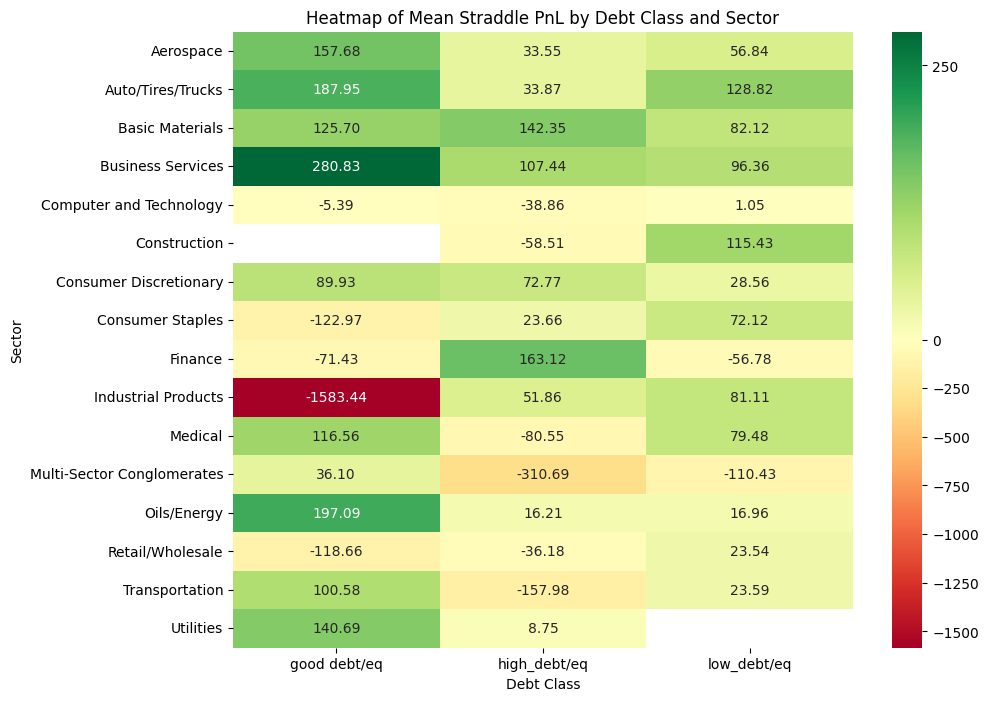

In [46]:


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Calculate vmin and vmax for color normalization
vmin = result_df.min().min()
vmax = result_df.max().max()
vcenter = 0
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

# Create a heatmap with annotations and using the normalized RdYlGn colormap
sns.heatmap(result_df, annot=True, cmap='RdYlGn', fmt=".2f", norm=norm)

# Add titles and labels
plt.title('Heatmap of Mean Straddle PnL by Debt Class and Sector')
plt.xlabel('Debt Class')
plt.ylabel('Sector')

# Display the heatmap
plt.show()


### PnL analysis across market cap

In [47]:
data_MKTV = quandl.get_table('ZACKS/MKTV', ticker = list(results['Short_ticker'].unique()), paginate = True)
data_MKTV

,ticker,m_ticker,comp_name,fye,per_type,per_end_date,active_ticker_flag,mkt_val,ep_val
None,,,,,,,,,
0,TJX,ZY,TJX COS INC NEW,1,Q,2024-03-31,Y,114906.21,112168.21
1,ZTS,ZTS,ZOETIS INC,12,Q,2024-03-31,Y,77389.80,81976.80
2,ZS,ZS,ZSCALER INC,7,Q,2024-03-31,Y,28875.24,27556.44
3,ZM,ZM,ZOOM VIDEO CMTS,1,Q,2024-03-31,Y,20105.18,13142.69
4,VLO,Z25Z,VALERO ENERGY,12,Q,2024-03-31,Y,56751.34,61878.34
...,...,...,...,...,...,...,...,...,...
27880,AAPL,AAPL,APPLE INC,9,Q,2006-03-31,Y,53417.28,45191.28
27881,AAP,AAP2,ADVANCE AUTO PT,12,Q,2006-03-31,Y,4499.33,4839.32
27882,AAL,AAL,AMER AIRLINES,12,Q,2006-03-31,Y,NaN,NaN


In [48]:
list(merged_df.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'index',
 'Short_ticker',
 'Name',
 'Ticker',
 'Date',
 'Event Type',
 'Adjusted Trading Date',
 'trade_entry',
 'trade_exit',
 'stock_price_entry',
 'stock_price_exit',
 'year_entry',
 'year_exit',
 'straddle_entry_mid',
 'IV_25c',
 'IV_25p',
 'IV_10c',
 'IV_10p',
 'IV_50c',
 'straddle_exit_mid',
 'straddle_pnl',
 'skew_25',
 'kurt_25',
 'skew_25_decile',
 'kurt_25_decile',
 'm_ticker_x',
 'ticker_x',
 'comp_name_x',
 'comp_name_2_x',
 'exchange_x',
 'currency_code_x',
 'ticker_type',
 'active_ticker_flag',
 'comp_url',
 'sic_4_code',
 'sic_4_desc',
 'zacks_x_ind_code',
 'zacks_x_ind_desc',
 'zacks_x_sector_code',
 'zacks_x_sector_desc',
 'zacks_m_ind_code',
 'zacks_m_ind_desc',
 'per_end_month_nbr',
 'mr_split_date',
 'mr_split_factor',
 'comp_cik',
 'country_code',
 'country_name',
 'comp_type',
 'optionable_flag',
 'sp500_member_flag',
 'asset_type',
 'quarter_x',
 'quarter_with_ticker',
 'm_ticker_y',
 'ticker_y',
 'comp_name_y',
 'comp_name_2_y',


In [49]:
data_MKTV['quarter']=data_MKTV['per_end_date'].apply(lambda x: current_quarter(x))
data_MKTV['quarter_with_ticker']=data_MKTV['quarter']+data_MKTV['ticker']
data_MKTV.drop_duplicates(subset='quarter_with_ticker',inplace=True)

In [50]:
data_MKTV

,ticker,m_ticker,comp_name,fye,per_type,per_end_date,active_ticker_flag,mkt_val,ep_val,quarter,quarter_with_ticker
None,,,,,,,,,,,
0,TJX,ZY,TJX COS INC NEW,1,Q,2024-03-31,Y,114906.21,112168.21,Q1 2024,Q1 2024TJX
1,ZTS,ZTS,ZOETIS INC,12,Q,2024-03-31,Y,77389.80,81976.80,Q1 2024,Q1 2024ZTS
2,ZS,ZS,ZSCALER INC,7,Q,2024-03-31,Y,28875.24,27556.44,Q1 2024,Q1 2024ZS
3,ZM,ZM,ZOOM VIDEO CMTS,1,Q,2024-03-31,Y,20105.18,13142.69,Q1 2024,Q1 2024ZM
4,VLO,Z25Z,VALERO ENERGY,12,Q,2024-03-31,Y,56751.34,61878.34,Q1 2024,Q1 2024VLO
...,...,...,...,...,...,...,...,...,...,...,...
27880,AAPL,AAPL,APPLE INC,9,Q,2006-03-31,Y,53417.28,45191.28,Q1 2006,Q1 2006AAPL
27881,AAP,AAP2,ADVANCE AUTO PT,12,Q,2006-03-31,Y,4499.33,4839.32,Q1 2006,Q1 2006AAP
27882,AAL,AAL,AMER AIRLINES,12,Q,2006-03-31,Y,NaN,NaN,Q1 2006,Q1 2006AAL


In [52]:
merged_df_mkt = pd.merge(merged_df,data_MKTV, left_on='quarter_with_ticker' , right_on='quarter_with_ticker', how='left')

# Display the merged dataframe
print(merged_df_mkt)

      Unnamed: 0.1  Unnamed: 0  index Short_ticker                      Name  \
0                2           2   2023            A  Agilent Technologies Inc   
1                7           7   5992            A  Agilent Technologies Inc   
2               25          25     32           AA                Alcoa Corp   
3               26          26    750           AA                Alcoa Corp   
4               27          27   1452           AA                Alcoa Corp   
...            ...         ...    ...          ...                       ...   
3154         19457       19457   4342          ZTS                Zoetis Inc   
3155         19459       19459   5843          ZTS                Zoetis Inc   
3156         19460       19460   6656          ZTS                Zoetis Inc   
3157         19462       19462   8015          ZTS                Zoetis Inc   
3158         19463       19463   8903          ZTS                Zoetis Inc   

      Ticker                 Date Event

In [66]:
merged_df_mkt['mkt_category']=['Micro Cap' if x < 300 else 'Small Cap' if 300 <= x < 2000 else 'Mid Cap' if 2000 <= x < 10000 else  
                               'Large Cap' if 200000<= x >10000 else 'Mega Cap' if x>200000 else  np.nan  for x in merged_df_mkt['mkt_val']]
merged_df_mkt.dropna(subset=['mkt_category'], inplace=True)

# Display the DataFrame to see the effect of dropna()
print(merged_df_mkt)


      Unnamed: 0.1  Unnamed: 0  index Short_ticker               Name  \
2               25          25     32           AA         Alcoa Corp   
3               26          26    750           AA         Alcoa Corp   
4               27          27   1452           AA         Alcoa Corp   
5               28          28   2166           AA         Alcoa Corp   
6               30          30   3658           AA         Alcoa Corp   
...            ...         ...    ...          ...                ...   
3119         19267       19267  14315         YETI  YETI Holdings Inc   
3120         19268       19268  15377         YETI  YETI Holdings Inc   
3121         19269       19269  16130         YETI  YETI Holdings Inc   
3146         19434       19434   6066           ZS        Zscaler Inc   
3147         19435       19435   6797           ZS        Zscaler Inc   

       Ticker                 Date Event Type      Adjusted Trading Date  \
2       AA US  2018-01-17 16:10:00         ER  

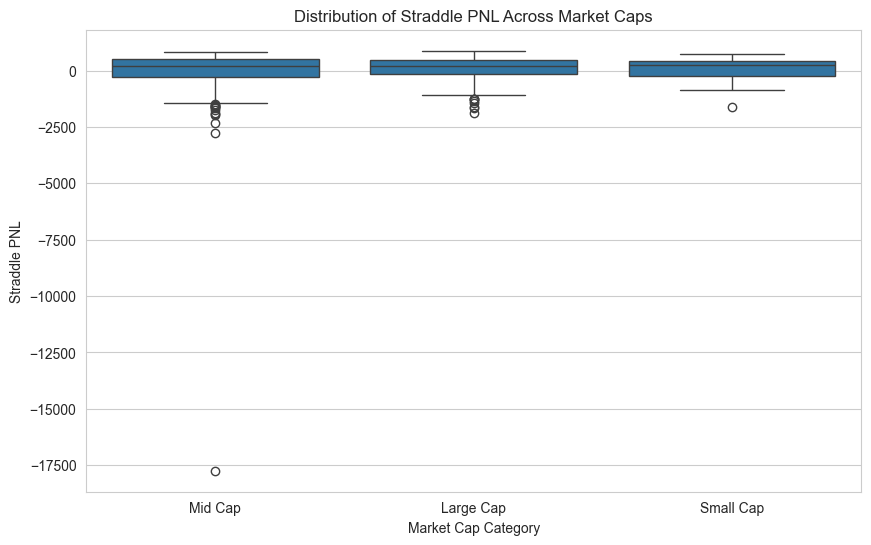

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='mkt_category', y='straddle_pnl', data=merged_df_mkt)
plt.title('Distribution of Straddle PNL Across Market Caps')
plt.xlabel('Market Cap Category')
plt.ylabel('Straddle PNL')
plt.show()

In [68]:
# Calculate the mean of 'market_cap' grouped by 'mkt_category'
mean_market_caps = merged_df_mkt.groupby('mkt_category')['straddle_pnl'].mean()
mean_market_caps

mkt_category
Large Cap    92.371987
Mid Cap     -10.594214
Small Cap    77.948782
Name: straddle_pnl, dtype: float64